In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/Station_Build_Up (1).csv")
df.sum()

Date_Time_Hour_Beginning            2021-03-01 16:00:002021-03-01 17:00:002021-03-...
Thermal_Gen_Excl_Pumping_and_SCO                                           3.4925e+06
Eskom_OCGT_SCO_Pumping                                                        -530.07
Eskom_Gas_SCO_Pumping                                                            -336
Hydro_Water_SCO_Pumping                                                             0
Pumped_Water_SCO_Pumping                                                      -117837
Thermal_Generation                                                         3.6112e+06
Nuclear_Generation                                                             155877
International_Imports                                                          188894
Eskom_OCGT_Generation                                                               0
Eskom_Gas_Generation                                                                0
Dispatchable_IPP_OCGT                                 

We keep thermal generation, nuclear generation, international imports, IPP OCGT, Hydro water, pumped water, Wind, PV, CSP, Other RE. International imports is mainly crude oil

In [3]:
#Look only at energy generation emissions rather than LCA

energy_sources = {
    'Thermal_Generation' : 955, #Value for coal, main thermal resource in South Africa
    'Nuclear_Generation' : 0, #
    'International_Imports' : 893, #Crude oil, most of the imports 
    'Hydro_Water_Generation' : 0,
    'Pumped_Water_Generation' : 0, 
    'Wind' : 0,
    'PV' : 0,
    'CSP' : 0, 
    'Other_RE' :0 
}

#So only thermal and imports have carbon intensity

In [4]:
df.index = df["Date_Time_Hour_Beginning"]
df.drop(['Date_Time_Hour_Beginning','Thermal_Gen_Excl_Pumping_and_SCO',
       'Eskom_OCGT_SCO_Pumping', 'Eskom_Gas_SCO_Pumping',
       'Hydro_Water_SCO_Pumping', 'Pumped_Water_SCO_Pumping',
       'IOS_Excl_ILS_and_MLR', 'ILS_Usage',
       'Manual_Load_Reduction_MLR', 'Eskom_OCGT_Generation', 'Eskom_Gas_Generation',
       'Dispatchable_IPP_OCGT'], axis = 1, inplace = True)


df1 = df.divide(df.sum(axis = 1), axis=0)

In [5]:
df1.head()

,Thermal_Generation,Nuclear_Generation,International_Imports,Hydro_Water_Generation,Pumped_Water_Generation,Wind,PV,CSP,Other_RE
Date_Time_Hour_Beginning,,,,,,,,,
2021-03-01 16:00:00,0.783863,0.033274,0.041404,0.021597,0.034491,0.035687,0.036964,0.012259,0.000460
2021-03-01 17:00:00,0.804688,0.032909,0.041233,0.021361,0.026674,0.037260,0.023519,0.011918,0.000439
2021-03-01 18:00:00,0.823158,0.032656,0.040292,0.021219,0.032691,0.035097,0.003376,0.011079,0.000431
2021-03-01 19:00:00,0.804551,0.031843,0.038322,0.020669,0.061939,0.031329,0.000006,0.010902,0.000439
2021-03-01 20:00:00,0.844195,0.033226,0.039657,0.021400,0.021150,0.028905,0.000000,0.011006,0.000461


In [6]:
therm = df1["Thermal_Generation"].to_frame()
therm["Energy_Source"] = "Thermal_Generation"
therm.rename(columns={0:'Energy generation (%)'}, inplace=True)
therm.drop(therm.tail(1).index,inplace=True)
therm.tail()

nuc = df1["Nuclear_Generation"].to_frame()
nuc["Energy_Source"] = "Nuclear_Generation"
nuc.rename(columns={"Nuclear_Generation":'Energy generation (%)'}, inplace=True)

inte = df1["International_Imports"].to_frame()
inte["Energy_Source"] = "International_Imports"
inte.rename(columns={"International_Imports":'Energy generation (%)'}, inplace=True)

hydro = df1["Hydro_Water_Generation"].to_frame()
hydro["Energy_Source"] = "Hydro_Water_Generation"
hydro.rename(columns={"Hydro_Water_Generation":'Energy generation (%)'}, inplace=True)

wat = df1["Pumped_Water_Generation"].to_frame()
wat["Energy_Source"] = "Pumped_Water_Generation"
wat.rename(columns={"Pumped_Water_Generation":'Energy generation (%)'}, inplace=True)

wind = df1["Wind"].to_frame()
wind["Energy_Source"] = "Wind"
wind.rename(columns={"Wind":'Energy generation (%)'}, inplace=True)

pv = df1["PV"].to_frame()
pv["Energy_Source"] = "PV"
pv.rename(columns={"PV":'Energy generation (%)'}, inplace=True)

csp = df1["CSP"].to_frame()
csp["Energy_Source"] = "CSP"
csp.rename(columns={"CSP":'Energy generation (%)'}, inplace=True)

ore = df1["Other_RE"].to_frame()
ore["Energy_Source"] = "Other_RE"
ore.rename(columns={"Other_RE":'Energy generation (%)'}, inplace=True)


gene_sa = therm.append(nuc).append(inte).append(hydro).append(wat).append(wind).append(pv).append(csp).append(ore)

C:\Users\Kirsch\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [7]:
gene_sa['Technology_Intensity'] = gene_sa['Energy_Source'].map(energy_sources)
gene_sa['Emission_Intensity'] = gene_sa['Technology_Intensity']*gene_sa['Thermal_Generation']
gene_sa[gene_sa.index == "2021-03-01 16:00:00"]

,Energy generation (%),Energy_Source,Thermal_Generation,Technology_Intensity,Emission_Intensity
Date_Time_Hour_Beginning,,,,,
2021-03-01 16:00:00,NaN,Thermal_Generation,0.783863,955,748.589426
2021-03-01 16:00:00,0.033274,Nuclear_Generation,NaN,0,NaN
2021-03-01 16:00:00,0.041404,International_Imports,NaN,893,NaN
2021-03-01 16:00:00,0.021597,Hydro_Water_Generation,NaN,0,NaN
2021-03-01 16:00:00,0.034491,Pumped_Water_Generation,NaN,0,NaN
2021-03-01 16:00:00,0.035687,Wind,NaN,0,NaN
2021-03-01 16:00:00,0.036964,PV,NaN,0,NaN
2021-03-01 16:00:00,0.012259,CSP,NaN,0,NaN
2021-03-01 16:00:00,0.000460,Other_RE,NaN,0,NaN


168


168

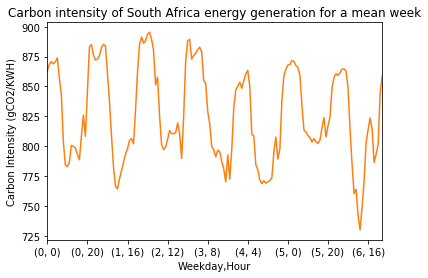

In [44]:
c_int = gene_sa.groupby(gene_sa.index)["Emission_Intensity"].apply(lambda x: np.sum(x)).to_frame()
print(len(c_int))
c_int.iloc[111] = 753
c_int["Emission_Intensity"]+=40
c_int.index = pd.to_datetime(c_int.index)

c_int["Weekday"] = c_int.index.weekday 
c_int["Hour"] = c_int.index.hour
c_int.head()
c_int.set_index(['Weekday', 'Hour'], inplace=True)
c_int.sort_index(ascending=True, inplace = True)
c_int.to_csv("../Data/SA_carbon_intensity.csv")


#Plot the carbon intensity evolution over a week 
c_int.plot(legend=None, color = "C1")
plt.title("Carbon intensity of South Africa energy generation for a mean week")
plt.xlabel("Weekday,Hour")
plt.ylabel("Carbon Intensity (gCO2/KWH)")
plt.savefig("carbonint_SA.png")

len(c_int)
